In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## **Investigate the data**

In [4]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.data', header = None, names = col_names)

In [6]:
#Distribution of income
df['income'].value_counts(normalize = True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [9]:
# Clean columns by stripping extra whitespace for columns of type "object"
for i in df.select_dtypes(include = ['object']).columns:
    df[i] = df[i].str.strip()

In [10]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']

X = pd.get_dummies(df[feature_cols], drop_first = True)
y = np.where(df.income == '<=50K', 0, 1)

In [12]:
#Split data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

## **Build and Tune Random Forest Classifiers by Depth**

In [16]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)

print(f'Accuracy score for default random forest: {round(rf.score(X_test, y_test)*100,3)}%')

Accuracy score for default random forest: 81.652%


In [36]:
# Tune the hyperparameter max_depth
np.random.seed(0)

accuracy_train = []
accuracy_test = []
depths = range(1, 26)

for depth in depths:
    rf = RandomForestClassifier(max_depth = depth)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy_test.append(rf.score(X_test, y_test))
    accuracy_train.append(rf.score(X_train, y_train))

In [37]:
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]

print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when depth: 13
The highest accuracy on the test set is: 83.065%


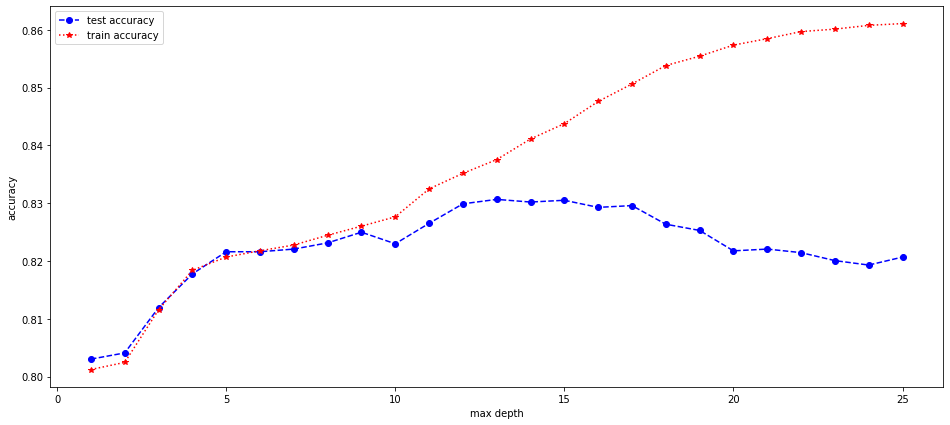

In [38]:
# Plot the accuracy scores for the test and train set over the range of depth values
plt.figure(figsize = (16, 7))
plt.plot(depths, accuracy_test, 'bo--')
plt.plot(depths, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [40]:
best_rf = RandomForestClassifier(max_depth = best_depth)
best_rf.fit(X_train, y_train)
feature_imp_df = pd.DataFrame({'Features':X_train.columns, 'Importance':best_rf.feature_importances_})

print("Top 5 random forest features:")
feature_imp_df.sort_values('Importance', ascending = False).iloc[:5]

Top 5 random forest features:


,Features,Importance
1,capital-gain,0.362852
0,age,0.247980
3,hours-per-week,0.145205
2,capital-loss,0.143997
4,sex_Male,0.079563


## **Create Additional Features and Re-Tune**

In [41]:
df['education_bin'] = pd.cut(df['education-num'], [0, 9, 13, 16], labels = ['HS or less', 'College to Bachelors', 'Master or More'])

In [43]:
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

X = pd.get_dummies(df[feature_cols], drop_first = True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [47]:
np.random.seed(0)

accuracy_score = []
accuracy_test = []
depths = range(1, 26)

for depth in depths:
    rf = RandomForestClassifier(max_depth = depth)
    rf.fit(X_train, y_train)

    accuracy_score.append(rf.score(X_train, y_train))
    accuracy_test.append(rf.score(X_test, y_test))

best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]

print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when depth: 12
The highest accuracy on the test set is: 84.37%


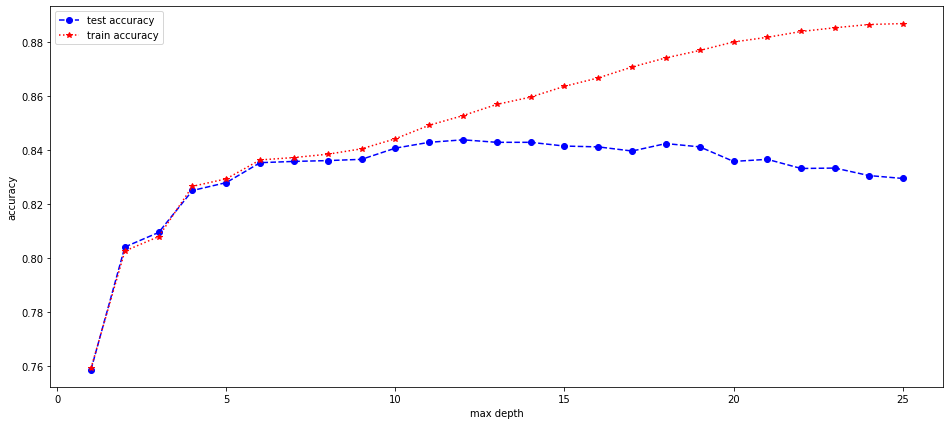

In [48]:
plt.figure(figsize = (16, 7))

plt.plot(depths, accuracy_test, 'bo--')
plt.plot(depths, accuracy_score, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [49]:
best_rf = RandomForestClassifier(max_depth = best_depth)
best_rf.fit(X_train, y_train)
feature_imp_df = pd.DataFrame({'Features':X_train.columns, 'Importance':best_rf.feature_importances_})

print("Top 5 random forest features:")
feature_imp_df.sort_values('Importance', ascending = False).iloc[:5]

Top 5 random forest features:


,Features,Importance
1,capital-gain,0.296666
0,age,0.215572
3,hours-per-week,0.118994
10,education_bin_Master or More,0.113835
2,capital-loss,0.103911
